# Import Library

In [24]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

# 資料準備

In [25]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [26]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [27]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [28]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [30]:
model = Sequential()

In [31]:
#卷積層1

In [32]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [33]:
model.add(Dropout(rate=0.25))

In [34]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [35]:
#卷積層2與池化層2

In [36]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [37]:
model.add(Dropout(0.25))

In [38]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [39]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [40]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [41]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [42]:
model.add(Dense(10, activation='softmax'))

In [43]:
#檢查model 的STACK
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)              0         
__________

# 載入之前訓練的模型

In [44]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

# 作業: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate

In [45]:
model.compile(loss='MSE', optimizer='sgd', metrics=['accuracy'])

'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''

'\n作業:\n請分別選用 "MSE", "binary _crossentropy"\n查看Train/test accurancy and loss rate\n'

In [46]:
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=16, verbose=1) 

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 266s 7ms/step - loss: 0.0897 - acc: 0.1268 - val_loss: 0.0893 - val_acc: 0.1737
Epoch 2/10
40000/40000 [==============================] - 268s 7ms/step - loss: 0.0887 - acc: 0.1653 - val_loss: 0.0884 - val_acc: 0.2258
Epoch 3/10
40000/40000 [==============================] - 267s 7ms/step - loss: 0.0871 - acc: 0.2064 - val_loss: 0.0869 - val_acc: 0.2587
Epoch 4/10
40000/40000 [==============================] - 275s 7ms/step - loss: 0.0851 - acc: 0.2443 - val_loss: 0.0852 - val_acc: 0.2807
Epoch 5/10
40000/40000 [==============================] - 262s 7ms/step - loss: 0.0835 - acc: 0.2685 - val_loss: 0.0839 - val_acc: 0.3043
Epoch 6/10
40000/40000 [==============================] - 264s 7ms/step - loss: 0.0824 - acc: 0.2914 - val_loss: 0.0831 - val_acc: 0.3188
Epoch 7/10
40000/40000 [==============================] - 288s 7ms/step - loss: 0.0813 - acc: 0.3080 - val_loss: 0.0820 - 

In [47]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

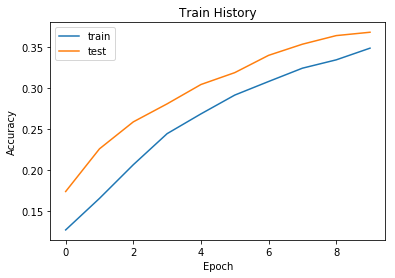

In [48]:
show_train_history('acc','val_acc')

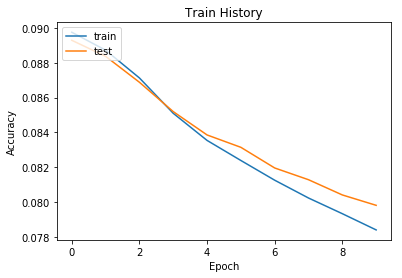

In [49]:
show_train_history('loss','val_loss')

In [51]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''

'\n作業:\n請分別選用 "MSE", "binary _crossentropy"\n查看Train/test accurancy and loss rate\n'

In [52]:
 train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=16, verbose=1)  

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 172s 4ms/step - loss: 0.2670 - acc: 0.9038 - val_loss: 0.2674 - val_acc: 0.9011
Epoch 2/10
40000/40000 [==============================] - 180s 5ms/step - loss: 0.2539 - acc: 0.9058 - val_loss: 0.2555 - val_acc: 0.9025
Epoch 3/10
40000/40000 [==============================] - 180s 4ms/step - loss: 0.2441 - acc: 0.9076 - val_loss: 0.2494 - val_acc: 0.9034
Epoch 4/10
40000/40000 [==============================] - 175s 4ms/step - loss: 0.2361 - acc: 0.9098 - val_loss: 0.2418 - val_acc: 0.9045
Epoch 5/10
40000/40000 [==============================] - 171s 4ms/step - loss: 0.2290 - acc: 0.9115 - val_loss: 0.2347 - val_acc: 0.9066
Epoch 6/10
40000/40000 [==============================] - 169s 4ms/step - loss: 0.2231 - acc: 0.9132 - val_loss: 0.2288 - val_acc: 0.9089
Epoch 7/10
40000/40000 [==============================] - 171s 4ms/step - loss: 0.2173 - acc: 0.9154 - val_loss: 0.2228 - 

In [53]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

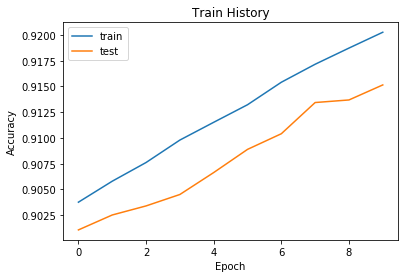

In [54]:
show_train_history('acc','val_acc')

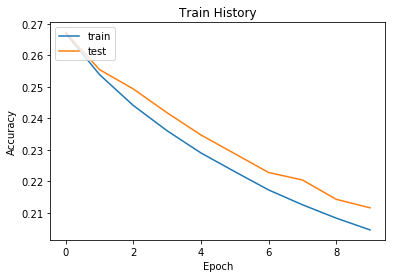

In [55]:
show_train_history('loss','val_loss')